# The Ups and Downs of the US National Park.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from cycler import cycler
import numpy as np
import re

% matplotlib inline

In [3]:
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42

In [4]:
#Turn off scientific notation
pd.set_option('display.float_format', lambda x: '%.2f' % x) 

In [5]:
visits = pd.read_excel('visitation.xlsx').fillna(0).drop(columns=['Average'])
visits.head()

,Park Name,1998,1999,2000,2001,2002,2003,2004,2005,2006,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,Abraham Lincoln Birthplace NHP,250842.00,251204.00,236180.00,229675.00,250772.00,211650.00,201828.00,190809.00,200054.00,...,200404.00,221111.00,177122.00,163568.00,169515.00,163928.00,241264.00,148605.00,252495.00,269580
1,Acadia NP,2594497.00,2602227.00,2469238.00,2516551.00,2558572.00,2431062.00,2207847.00,2051484.00,2083588.00,...,2075857.00,2227698.00,2504208.00,2374645.00,2431052.00,2254922.00,2563129.00,2811184.00,3303393.00,3509271
2,Adams NHP,63569.00,84574.00,87347.00,167500.00,173944.00,215659.00,239504.00,220467.00,225318.00,...,241536.00,253656.00,73339.00,219975.00,336031.00,285501.00,178468.00,183632.00,199301.00,255562
3,African Burial Ground NM,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,117113.00,108585.00,77624.00,93234.00,54861.00,56348.00,46526.00,43182
4,Agate Fossil Beds NM,17594.00,18117.00,17933.00,17399.00,17129.00,16233.00,15235.00,14209.00,13521.00,...,12425.00,12694.00,12509.00,11617.00,11824.00,10504.00,12440.00,13264.00,15555.00,32038


In [6]:
years = list(visits.columns.values)[1:]
years

[1998,
 1999,
 2000,
 2001,
 2002,
 2003,
 2004,
 2005,
 2006,
 2007,
 2008,
 2009,
 2010,
 2011,
 2012,
 2013,
 2014,
 2015,
 2016,
 2017]

In [8]:
#wide to long data form
visits = pd.melt(visits, id_vars='Park Name', value_vars=years)

In [9]:
visits.head()

,Park Name,variable,value
0,Abraham Lincoln Birthplace NHP,1998,250842.00
1,Acadia NP,1998,2594497.00
2,Adams NHP,1998,63569.00
3,African Burial Ground NM,1998,0.00
4,Agate Fossil Beds NM,1998,17594.00


In [10]:
#changing column name
visits.rename(columns={'variable': 'Year', 'value': 'Visits'}, inplace=True)

In [11]:
visits.head()

,Park Name,Year,Visits
0,Abraham Lincoln Birthplace NHP,1998,250842.00
1,Acadia NP,1998,2594497.00
2,Adams NHP,1998,63569.00
3,African Burial Ground NM,1998,0.00
4,Agate Fossil Beds NM,1998,17594.00


## Part 0: How is the total visits to all National Park Service site change over the past 20 years?
***National Park Service sites includes national parks, national historic sites, battlefileds, natural preserve, national monuments, etc. ***

In [12]:
from matplotlib.ticker import FuncFormatter

#step1: build a function
# it should take value and pos
def with_commas(value,x_pos):
    
    return "{:,}".format(int(value))

formatter = FuncFormatter(with_commas)



In [13]:
visits['date_year'] = pd.to_datetime(visits['Year'],format = '%Y')

In [14]:
visits.head()

,Park Name,Year,Visits,date_year
0,Abraham Lincoln Birthplace NHP,1998,250842.00,1998-01-01
1,Acadia NP,1998,2594497.00,1998-01-01
2,Adams NHP,1998,63569.00,1998-01-01
3,African Burial Ground NM,1998,0.00,1998-01-01
4,Agate Fossil Beds NM,1998,17594.00,1998-01-01


In [15]:
# def with_commas(value,x_pos):
    
#     return "{:,}".format(int(value))

def with_millions(value,x_pos):
    millions = int(value/1000000)
    if millions == 330:
        
        return "{} MM".format(millions)
    elif millions ==0:
        return 0
    else:
        return millions

formatter = FuncFormatter(with_millions)

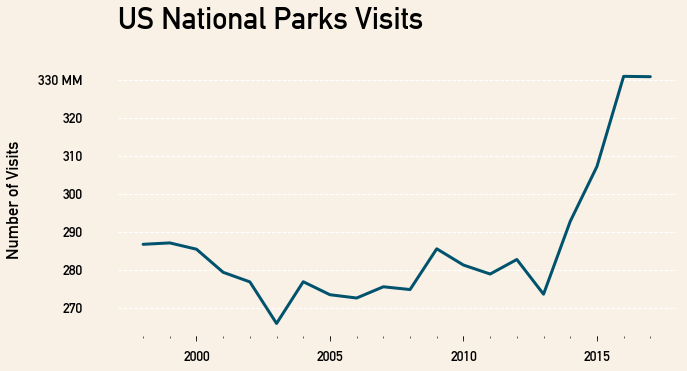

In [16]:

plt.rcParams.update({
  'lines.linewidth': 3,
  'lines.solid_capstyle': 'round',
  'font.family':'DIN ALTERNATE' ,
  'font.stretch':'normal',
  'legend.fancybox': False,
  'legend.frameon':False,
  'axes.prop_cycle': cycler('color', ['#00526d','#f0bb7f','#d9816b','#90ced6','#81ba9a','#f15b40']),
  'axes.facecolor': '#f9f1e6',
 'axes.grid': True,
  'axes.labelsize': 'large',
  'axes.axisbelow': True,
  'axes.formatter.limits':[-20,20],
  'axes.edgecolor': '#00526d',
  'axes.linewidth': 1.0,
  'axes.titlesize': 'x-large',
    'axes.spines.left'   : False,
    'axes.spines.bottom' : False,
    'axes.spines.top'    : False,
    'axes.spines.right'  : False,
 
  'grid.linestyle': '--',
  'grid.linewidth': 1.0,
  'grid.color': '#FFFFFF',

    'xtick.major.pad': 10,
    'ytick.major.pad': 35,
    'ytick.left'           : True,
    'ytick.direction'      : 'out',
  'xtick.major.size': 5,
  'xtick.minor.size': 2,
  'ytick.major.size': 0,
  'ytick.minor.size': 0,
    'xtick.minor.visible'  : True,
  'font.size': 14.0,
  'figure.facecolor': '#f9f1e6',
'savefig.facecolor'   :  '#f9f1e6'  # figure facecolor when saving

})

#set number of tickers


import numpy as np
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)
majorLocator = MultipleLocator(1)
majorFormatter = FormatStrFormatter('%d')



# plt.setp( ax.yaxis.get_majorticklabels(), ha="center" )

ax = visits.groupby('date_year').Visits.sum().plot(x='Year',kind = 'line',figsize=(10,5))
ax.yaxis.set_major_formatter(formatter)
plt.title("US National Parks Visits",pad = 35,loc='left',fontsize=30)

ax.grid(False, axis='x')
ax.set_ylabel("Number of Visits",labelpad = 15)
ax.set_xlabel("")
#ax.set_ylim(0,4200000)

ax.xaxis.tick_bottom()


# plt.savefig("total_visits.pdf",bbox_inches='tight')
# plt.savefig('total_visits.png',dpi = 600, bbox_inches='tight')
# plt.show()

## Part 1: How Does the Number of Visits to the US National Parks Changed Over time? What are the most popular national parks in 2017, how's their popularity change along time?

***Now let's narrow down the NPS to only the national parks (NP)***

In [17]:
visits_long = pd.read_excel('visitation.xlsx').fillna(0).drop('Average',axis=1)
visits_long.head(10)

,Park Name,1998,1999,2000,2001,2002,2003,2004,2005,2006,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,Abraham Lincoln Birthplace NHP,250842.00,251204.00,236180.00,229675.00,250772.00,211650.00,201828.00,190809.00,200054.00,...,200404.00,221111.00,177122.00,163568.00,169515.00,163928.00,241264.00,148605.00,252495.00,269580
1,Acadia NP,2594497.00,2602227.00,2469238.00,2516551.00,2558572.00,2431062.00,2207847.00,2051484.00,2083588.00,...,2075857.00,2227698.00,2504208.00,2374645.00,2431052.00,2254922.00,2563129.00,2811184.00,3303393.00,3509271
2,Adams NHP,63569.00,84574.00,87347.00,167500.00,173944.00,215659.00,239504.00,220467.00,225318.00,...,241536.00,253656.00,73339.00,219975.00,336031.00,285501.00,178468.00,183632.00,199301.00,255562
3,African Burial Ground NM,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,117113.00,108585.00,77624.00,93234.00,54861.00,56348.00,46526.00,43182
4,Agate Fossil Beds NM,17594.00,18117.00,17933.00,17399.00,17129.00,16233.00,15235.00,14209.00,13521.00,...,12425.00,12694.00,12509.00,11617.00,11824.00,10504.00,12440.00,13264.00,15555.00,32038
5,Alibates Flint Quarries NM,3293.00,3047.00,3131.00,2456.00,2125.00,1811.00,2012.00,2919.00,1882.00,...,2297.00,2918.00,4350.00,3214.00,3383.00,1555.00,4513.00,9492.00,8153.00,6613
6,Allegheny Portage Railroad NHS,111100.00,111391.00,133396.00,142340.00,146484.00,129995.00,126441.00,115357.00,121009.00,...,113991.00,118931.00,107363.00,118410.00,138864.00,107977.00,172883.00,168433.00,189371.00,201837
7,Amistad NRA,1129811.00,1164166.00,1234506.00,1097650.00,1047784.00,1071199.00,1445772.00,1399852.00,1599271.00,...,1980717.00,2573966.00,1574322.00,1436759.00,1367502.00,1025151.00,1130096.00,1250051.00,1164530.00,1221635
8,Andersonville NHS,225653.00,182539.00,167373.00,160974.00,190004.00,150661.00,165929.00,132466.00,132153.00,...,159592.00,136267.00,121535.00,108812.00,122883.00,98771.00,127189.00,136686.00,134216.00,132149
9,Andrew Johnson NHS,60207.00,51779.00,59897.00,49551.00,48878.00,51910.00,50196.00,48552.00,50701.00,...,69433.00,63296.00,60323.00,52322.00,51261.00,42929.00,42863.00,45357.00,45937.00,53998


In [18]:
parks_all = visits_long[visits_long['Park Name'].str.contains(r"NP$")]

In [19]:
parks_all

,Park Name,1998,1999,2000,2001,2002,2003,2004,2005,2006,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
1,Acadia NP,2594497.00,2602227.00,2469238.00,2516551.00,2558572.00,2431062.00,2207847.00,2051484.00,2083588.00,...,2075857.00,2227698.00,2504208.00,2374645.00,2431052.00,2254922.00,2563129.00,2811184.00,3303393.00,3509271
14,Arches NP,837161.00,869980.00,786429.00,754026.00,769672.00,757781.00,733131.00,781670.00,833049.00,...,928795.00,996312.00,1014405.00,1040758.00,1070577.00,1082866.00,1284767.00,1399247.00,1585718.00,1539028
19,Badlands NP,1021049.00,950453.00,1105824.00,955469.00,908898.00,871034.00,936030.00,909146.00,840118.00,...,845734.00,933918.00,977778.00,870741.00,883406.00,892372.00,868094.00,989354.00,996263.00,1054325
24,Big Bend NP,338442.00,327649.00,262320.00,328927.00,327747.00,312384.00,357723.00,398583.00,298717.00,...,362512.00,363905.00,372330.00,361862.00,292055.00,316953.00,314102.00,381747.00,388290.00,440276
30,Biscayne NP,403239.00,442585.00,393151.00,489343.00,513397.00,490031.00,478304.00,563728.00,608836.00,...,686062.00,437745.00,467612.00,476077.00,495613.00,486848.00,525745.00,508164.00,514709.00,446961
31,Black Canyon of the Gunnison NP,193451.00,200142.00,191506.00,181018.00,173687.00,167247.00,175581.00,180814.00,160450.00,...,160185.00,171451.00,176344.00,168336.00,192570.00,175852.00,183045.00,209166.00,238018.00,307143
38,Bryce Canyon NP,1166331.00,1081521.00,1099275.00,1068619.00,886436.00,903760.00,987253.00,1017681.00,890676.00,...,1043321.00,1216377.00,1285492.00,1296000.00,1385352.00,1311875.00,1435741.00,1745804.00,2365110.00,2571684
45,Canyonlands NP,436524.00,446160.00,401558.00,368592.00,367078.00,386986.00,371706.00,393381.00,392537.00,...,436715.00,436241.00,435908.00,473773.00,452952.00,462242.00,542431.00,634607.00,776218.00,742271
50,Capitol Reef NP,656026.00,680153.00,612656.00,527760.00,525646.00,535441.00,549708.00,550255.00,511511.00,...,604811.00,617208.00,662661.00,668834.00,673345.00,663670.00,786514.00,941029.00,1064904.00,1150165
53,Carlsbad Caverns NP,522076.00,514418.00,469303.00,455621.00,476259.00,457631.00,419599.00,413786.00,407367.00,...,400381.00,432639.00,428524.00,365000.00,381058.00,388566.00,397309.00,445720.00,466773.00,520026


In [156]:
years = list(parks_all.columns.values)[1:]
years

[1998,
 1999,
 2000,
 2001,
 2002,
 2003,
 2004,
 2005,
 2006,
 2007,
 2008,
 2009,
 2010,
 2011,
 2012,
 2013,
 2014,
 2015,
 2016,
 2017]

In [21]:


#wide to long data form
parks_allnew = pd.melt(parks_all, id_vars='Park Name', value_vars=years)


parks_allnew.tail()



,Park Name,variable,value
1035,Voyageurs NP,2017,237250.00
1036,Wind Cave NP,2017,619924.00
1037,Yellowstone NP,2017,4116524.00
1038,Yosemite NP,2017,4336890.00
1039,Zion NP,2017,4504812.00


In [22]:
#changing column name
parks_allnew.rename(columns={'variable': 'Year', 'value': 'Visits'}, inplace=True)

In [23]:
parks_allnew['date_year'] = pd.to_datetime(parks_allnew['Year'],format = '%Y')

In [24]:
parks_allnew.head()

,Park Name,Year,Visits,date_year
0,Acadia NP,1998,2594497.00,1998-01-01
1,Arches NP,1998,837161.00,1998-01-01
2,Badlands NP,1998,1021049.00,1998-01-01
3,Big Bend NP,1998,338442.00,1998-01-01
4,Biscayne NP,1998,403239.00,1998-01-01


In [154]:
# def with_commas(value,x_pos):
    
#     return "{:,}".format(int(value))

def with_millions(value,x_pos):
    millions = int(value/1000000)
    if millions == 80:
        
        return "{} MM".format(millions)
    elif millions ==0:
        return 0
    else:
        return millions

formatter = FuncFormatter(with_millions)



Text(0.5,0,'')

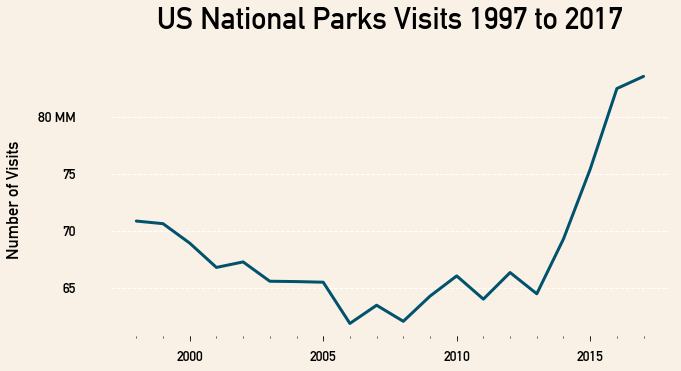

In [158]:
ax = parks_allnew.groupby('date_year').Visits.sum().plot(x='Year',kind = 'line',figsize=(10,5))
ax.yaxis.set_major_formatter(formatter)
plt.title("US National Parks Visits 1997 to 2017",pad = 35,loc='center',fontsize=30)


ax.grid(False, axis='x')
ax.set_ylabel("Number of Visits",labelpad = 15)
ax.set_xlabel("")

Text(0.5,0,'')

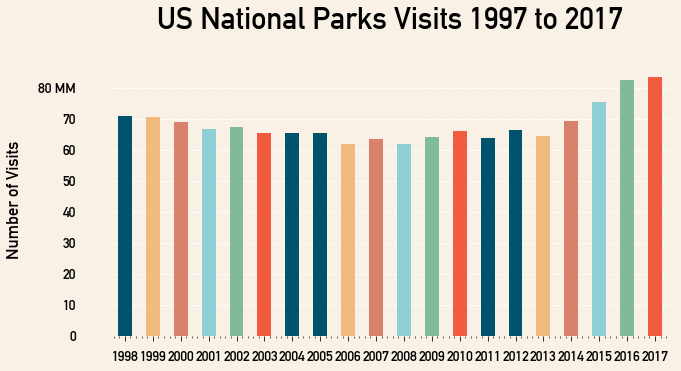

In [157]:
ax = parks_allnew.groupby('Year').Visits.sum().plot(x='Year',kind = 'bar',figsize=(10,5))
ax.yaxis.set_major_formatter(formatter)
plt.title("US National Parks Visits 1997 to 2017",pad = 35,loc='center',fontsize=30)
ax.set_xticklabels(years,rotation= 'horizontal')

ax.grid(False, axis='x')
ax.set_ylabel("Number of Visits",labelpad = 15)
ax.set_xlabel("")



# plt.savefig("NP_visits.pdf",bbox_inches='tight')
# plt.savefig('NP_visits.png',dpi = 600, bbox_inches='tight')
# plt.show()


## What is the most popular parks in 1998 and 2017? Are they the same parks?

In [29]:
# add details about each park
df = pd.read_excel('monthly_visits.xlsx')
df.head()

monthly = pd.read_excel('monthly_visits.xlsx')
monthly = monthly[['Park','Region','State','Year','Month','Recreation Visits']]
monthly.shape

#changing column name
monthly.rename(columns={'Park': 'Park Name', 'Recreation Visits': 'Visits'}, inplace=True)

In [30]:
monthly.head()

,Park Name,Region,State,Year,Month,Visits
0,Acadia NP,Northeast,ME,1998,1,16726
1,Acadia NP,Northeast,ME,1998,2,17028
2,Acadia NP,Northeast,ME,1998,3,27500
3,Acadia NP,Northeast,ME,1998,4,81896
4,Acadia NP,Northeast,ME,1998,5,148052


In [31]:
park_info = monthly.groupby(['Park Name','Region','State']).Visits.mean().reset_index().drop('Visits',axis = 1)
park_info.head()

,Park Name,Region,State
0,Acadia NP,Northeast,ME
1,Arches NP,Intermountain,UT
2,Badlands NP,Midwest,SD
3,Big Bend NP,Intermountain,TX
4,Biscayne NP,Southeast,FL


In [32]:
parks_allnew.head()


,Park Name,Year,Visits,date_year
0,Acadia NP,1998,2594497.00,1998-01-01
1,Arches NP,1998,837161.00,1998-01-01
2,Badlands NP,1998,1021049.00,1998-01-01
3,Big Bend NP,1998,338442.00,1998-01-01
4,Biscayne NP,1998,403239.00,1998-01-01


In [33]:
parks_allnew = pd.merge(parks_allnew,park_info,on='Park Name')
parks_allnew.head()

,Park Name,Year,Visits,date_year,Region,State
0,Acadia NP,1998,2594497.00,1998-01-01,Northeast,ME
1,Acadia NP,1999,2602227.00,1999-01-01,Northeast,ME
2,Acadia NP,2000,2469238.00,2000-01-01,Northeast,ME
3,Acadia NP,2001,2516551.00,2001-01-01,Northeast,ME
4,Acadia NP,2002,2558572.00,2002-01-01,Northeast,ME


In [34]:
parks_allnew['Park_State'] = parks_allnew['Park Name']+', '+parks_allnew['State']

In [35]:
parks_allnew.head()

,Park Name,Year,Visits,date_year,Region,State,Park_State
0,Acadia NP,1998,2594497.00,1998-01-01,Northeast,ME,"Acadia NP, ME"
1,Acadia NP,1999,2602227.00,1999-01-01,Northeast,ME,"Acadia NP, ME"
2,Acadia NP,2000,2469238.00,2000-01-01,Northeast,ME,"Acadia NP, ME"
3,Acadia NP,2001,2516551.00,2001-01-01,Northeast,ME,"Acadia NP, ME"
4,Acadia NP,2002,2558572.00,2002-01-01,Northeast,ME,"Acadia NP, ME"


In [36]:
top2017 = parks_allnew[parks_allnew.date_year=='2017-01-01'].sort_values(by = 'Visits',ascending = False).head(20).sort_values(by='Visits')
top2017

,Park Name,Year,Visits,date_year,Region,State,Park_State
299,Death Valley NP,2017,1294827.00,2017-01-01,Pacific West,CA,"Death Valley NP, CA"
359,Gateway Arch NP,2017,1398188.00,2017-01-01,Midwest,MO,"Gateway Arch NP, MO"
719,Mount Rainier NP,2017,1415867.00,2017-01-01,Pacific West,WA,"Mount Rainier NP, WA"
899,Shenandoah NP,2017,1458874.00,2017-01-01,Northeast,VA,"Shenandoah NP, VA"
39,Arches NP,2017,1539028.00,2017-01-01,Intermountain,UT,"Arches NP, UT"
539,Hot Springs NP,2017,1561616.00,2017-01-01,Midwest,AR,"Hot Springs NP, AR"
519,Hawaii Volcanoes NP,2017,2016702.00,2017-01-01,Pacific West,HI,"Hawaii Volcanoes NP, HI"
279,Cuyahoga Valley NP,2017,2226879.00,2017-01-01,Midwest,OH,"Cuyahoga Valley NP, OH"
139,Bryce Canyon NP,2017,2571684.00,2017-01-01,Intermountain,UT,"Bryce Canyon NP, UT"
579,Joshua Tree NP,2017,2853619.00,2017-01-01,Pacific West,CA,"Joshua Tree NP, CA"


In [132]:
#assign bar colors based on region
def get_color(region):
    if region == "Southeast ":
        return '#f15b40'
    elif region == 'Intermountain ':
        return '#2b616d'
    elif region == 'Pacific West ':
        return '#f0bb7f'
    elif region == 'Northeast ':
        return '#ec8b71'
    elif region == 'Midwest ':
        return '#90ced6'
    else:
        return 'pink'

bar_colors = [get_color(region) for region in top2017.Region]

In [96]:
bar_colors = [get_color(region) for region in top2017.Region]
bar_colors

['pink',
 'pink',
 'pink',
 'pink',
 'pink',
 'pink',
 'pink',
 'pink',
 'pink',
 'pink',
 'pink',
 'pink',
 'pink',
 'pink',
 'pink',
 'pink',
 'pink',
 'pink',
 'pink',
 'pink']

In [145]:
plt.rcParams.update({
    'axes.prop_cycle': cycler('color', ['#00526d','#f0bb7f','#d9816b','#90ced6','#81ba9a','#f15b40']),
})
def with_millions(value,x_pos):
    millions = int(value/1000000)
    if millions == 10:
        
        return "{} MM".format(millions)
    elif millions ==0:
        return 0
    else:
        return millions

formatter = FuncFormatter(with_millions)

In [77]:
[row for row in top2017.Park_State]

['Death Valley NP, CA',
 'Gateway Arch NP, MO',
 'Mount Rainier NP, WA',
 'Shenandoah NP, VA',
 'Arches NP, UT',
 'Hot Springs NP, AR',
 'Hawaii Volcanoes NP, HI',
 'Cuyahoga Valley NP, OH',
 'Bryce Canyon NP, UT',
 'Joshua Tree NP, CA',
 'Glacier NP, MT',
 'Grand Teton NP, WY',
 'Olympic NP, WA',
 'Acadia NP, ME',
 'Yellowstone NP, WY',
 'Yosemite NP, CA',
 'Rocky Mountain NP, CO',
 'Zion NP, UT',
 'Grand Canyon NP, AZ',
 'Great Smoky Mountains NP, TN']

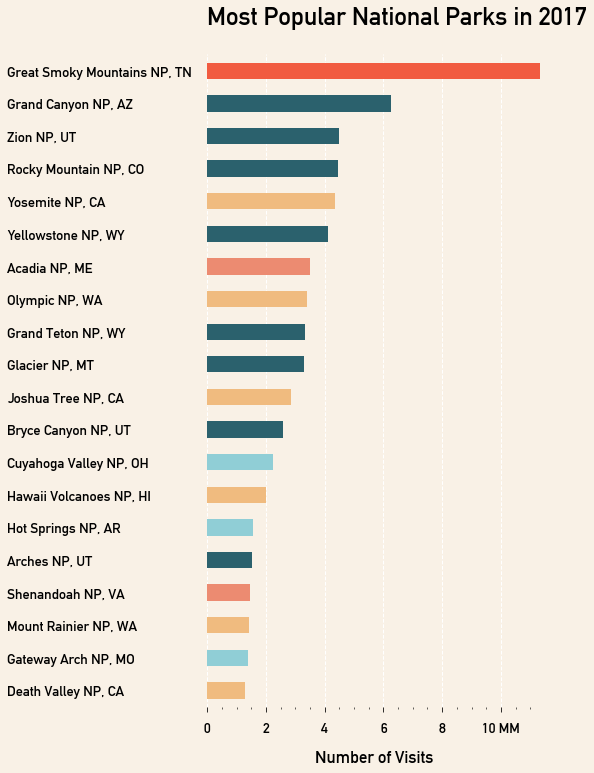

In [147]:

ax = top2017.plot(x='Park_State',
             y='Visits',
             kind = 'barh',
             figsize = (6,12),
             legend = False,
                 color = bar_colors)

ax.set_xlim(0,11400000)
yax = ax.get_yaxis()
yax.set_tick_params(pad=200)
ax.yaxis.set_ticklabels([row for row in top2017.Park_State],ha='left')
              
ax.set_title('Most Popular National Parks in 2017',pad = 30,loc='left',fontsize=25)



ax.grid(False, axis='y')

ax.set_ylabel('')

ax.set_xlabel("Number of Visits",labelpad = 15)

ax.xaxis.set_major_formatter(formatter)

plt.savefig("top2017_half.pdf",bbox_inches='tight')
plt.savefig('top2017_half.png',dpi = 600, bbox_inches='tight')


In [40]:
top1998 = parks_allnew[parks_allnew.date_year=='1998-01-01'].sort_values(by = 'Visits',ascending = False).head(20).sort_values(by='Visits')
top1998

,Park Name,Year,Visits,date_year,Region,State,Park_State
280,Death Valley NP,1998,1177746.00,1998-01-01,Pacific West,CA,"Death Valley NP, CA"
500,Hawaii Volcanoes NP,1998,1352373.00,1998-01-01,Pacific West,HI,"Hawaii Volcanoes NP, HI"
700,Mount Rainier NP,1998,1353793.00,1998-01-01,Pacific West,WA,"Mount Rainier NP, WA"
560,Joshua Tree NP,1998,1410312.00,1998-01-01,Pacific West,CA,"Joshua Tree NP, CA"
880,Shenandoah NP,1998,1473100.00,1998-01-01,Northeast,VA,"Shenandoah NP, VA"
480,Haleakala NP,1998,1476842.00,1998-01-01,Pacific West,HI,"Haleakala NP, HI"
520,Hot Springs NP,1998,1495993.00,1998-01-01,Midwest,AR,"Hot Springs NP, AR"
360,Glacier NP,1998,1830944.00,1998-01-01,Intermountain,MT,"Glacier NP, MT"
660,Mammoth Cave NP,1998,2113992.00,1998-01-01,Southeast,KY,"Mammoth Cave NP, KY"
1020,Zion NP,1998,2370048.00,1998-01-01,Intermountain,UT,"Zion NP, UT"


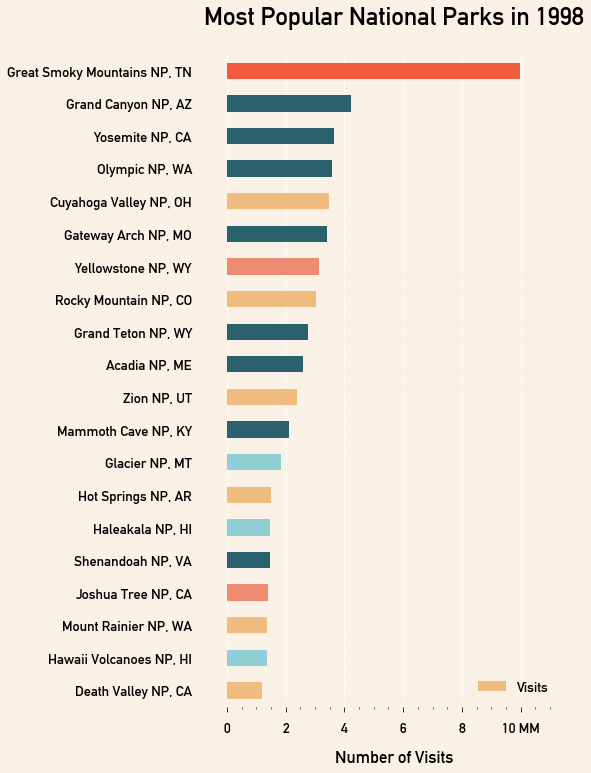

In [148]:
ax = top1998.plot(x='Park_State',y='Visits',kind = 'barh',figsize = (6,12),legend = True,color = bar_colors)
ax.set_title('Most Popular National Parks in 1998',pad = 30,ha='center',fontsize=25)

ax.grid(False, axis='y')
ax.set_xlim(0,11400000)
ax.set_ylabel('')

ax.set_xlabel("Number of Visits",labelpad = 15)
ax.xaxis.set_major_formatter(formatter)

plt.savefig("top1998_half.pdf",bbox_inches='tight')
plt.savefig('top1998_half.png',dpi = 600, bbox_inches='tight')

In [ ]:
#seems like most of the top 10NP are the same except Gateway Arch NP replaced by Zion NP in 2017...

In [ ]:
parks9817 = visits_long[['Park Name',1998,2017]]

In [84]:
#compare popularity of the most popular NP in 2017 for the past 20 years

In [51]:
parks = visits_long[['Park Name',1998,2017]]

In [52]:
parks.head()

,Park Name,1998,2017
0,Abraham Lincoln Birthplace NHP,250842.00,269580
1,Acadia NP,2594497.00,3509271
2,Adams NHP,63569.00,255562
3,African Burial Ground NM,0.00,43182
4,Agate Fossil Beds NM,17594.00,32038


In [53]:
parks_new=parks[parks['Park Name'].str.contains(r"NP$")]

In [54]:
parks_new.head()

,Park Name,1998,2017
1,Acadia NP,2594497.00,3509271
14,Arches NP,837161.00,1539028
19,Badlands NP,1021049.00,1054325
24,Big Bend NP,338442.00,440276
30,Biscayne NP,403239.00,446961


In [ ]:
parks_new[1998].nlargest(10)

In [ ]:
parks_new.shape
#52 National Parks in total

In [55]:
top10parks = parks_new.sort_values(by=2017,ascending = False).head(20)['Park Name'].tolist()

In [ ]:
top10parks

***Let's try to turn the wide data to long data***

In [510]:
visits.dtypes

Park Name            object
Year                 object
Visits              float64
date_year    datetime64[ns]
dtype: object

In [511]:
visits_selected = visits[visits.date_year.isin([ '1998-01-01','2007-01-01','2017-01-01'])]

In [48]:
visits_selected = visits[visits.date_year.isin([ '1998-01-01','2017-01-01'])]

In [56]:
visits_selected=visits_selected[visits_selected['Park Name'].isin(top10parks)]

In [513]:
top10parks

['Acadia NP',
 'Glacier NP',
 'Grand Canyon NP',
 'Grand Teton NP',
 'Great Smoky Mountains NP',
 'Olympic NP',
 'Rocky Mountain NP',
 'Yellowstone NP',
 'Yosemite NP',
 'Zion NP']

In [514]:
visits_selected

,Park Name,Year,Visits,date_year
1,Acadia NP,1998,2594497.00,1998-01-01
147,Glacier NP,1998,1830944.00,1998-01-01
152,Grand Canyon NP,1998,4239682.00,1998-01-01
154,Grand Teton NP,1998,2757060.00,1998-01-01
158,Great Smoky Mountains NP,1998,9989395.00,1998-01-01
265,Olympic NP,1998,3577007.00,1998-01-01
297,Rocky Mountain NP,1998,3035422.00,1998-01-01
375,Yellowstone NP,1998,3120830.00,1998-01-01
376,Yosemite NP,1998,3657132.00,1998-01-01
378,Zion NP,1998,2370048.00,1998-01-01


In [561]:

plt.rcParams.update({

  'axes.prop_cycle': cycler('color', ['#f0bb7f','#d9816b','#90ced6','#00526d','#81ba9a','#f15b40']),
  'axes.facecolor': '#f9f1e6',
'axes.grid': True,
  

})


Text(0,1,'Up and Downs of The Most Popular National Parks of 2017')

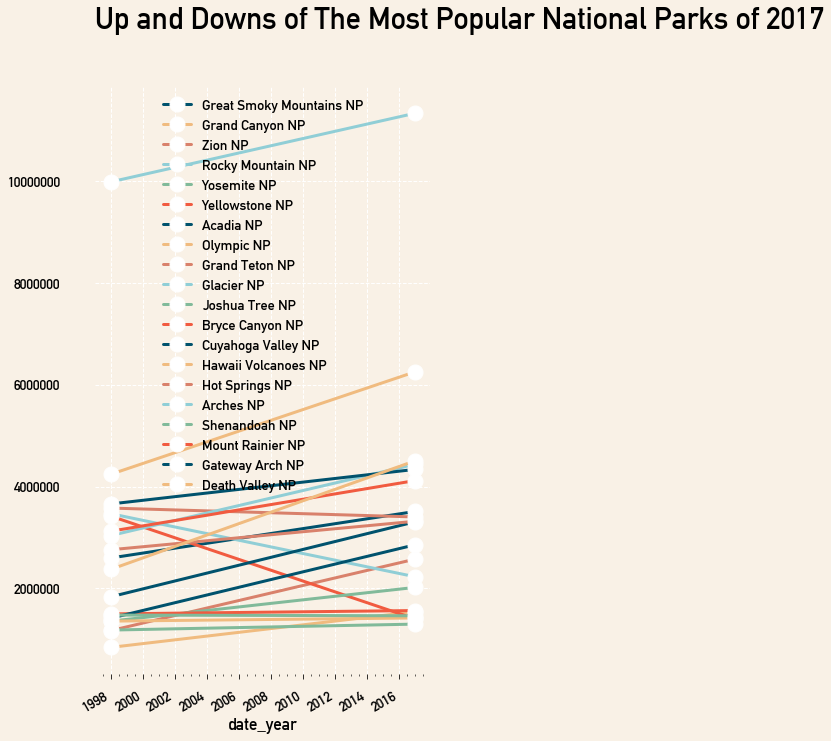

In [58]:
fig, ax = plt.subplots()
# Creating our list of labels, in alphabetical order
labels = top10parks
# Here, doing some styling (the legend will be ugly because I set the marker as being white dots)
# But this enables you to generate lines that are not continuous which kinda makes it look like your sketch
ax = visits_selected.groupby(['Park Name']).plot(marker = 'o', 
                                                 figsize = (6,12),
                                                 x='date_year',
                                                 y='Visits', 
                                                 linestyle='-',
                                                 ax=ax, 
                                                 markerfacecolor ='white', 
                                                 markeredgecolor ='white', 
                                                 markersize=15,
                                                )
plt.legend(labels=labels)
# Creating title
plt.title("Up and Downs of The Most Popular National Parks of 2017",pad = 58,loc='left',fontsize=30)


In [ ]:
visits_selected.groupby('date_year').Visits.nlargest(10)

In [ ]:
visits_selected.groupby(['Park Name']).Visits.plot(title='Hello')

In [ ]:
fig, ax = plt.subplots()
visits_selected.groupby('date_year').plot(marker = 'o',
                                                 figsize = (10,8),
                                                 x='date_year',
                                                 y='Visits',
                                                 title='Up and Downs of The Most Popular National Parks of 2017',
                                                 ax=ax)

## Part 2: What is people's favourite overnight stays options? How do the preferences change over time?

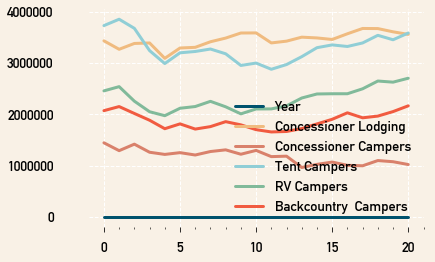

In [162]:
overnights = pd.read_excel('overnights_choices.xlsx')

overnights.plot()

In [163]:
overnights.head()

,Year,Concessioner Lodging,Concessioner Campers,Tent Campers,RV Campers,Backcountry Campers
0,2017,3437279,1447861,3734119,2460834,2074773
1,2016,3272026,1294573,3858162,2543221,2154698
2,2015,3385750,1421213,3680809,2260198,2020068
3,2014,3395578,1263610,3246320,2053965,1888095
4,2013,3095769,1221314,2993845,1976551,1722663


In [164]:
overnights['date_year'] = pd.to_datetime(overnights['Year'],format = '%Y')

In [165]:
overnights=overnights.drop(columns=['Year'])

In [166]:
overnights.tail()

,Concessioner Lodging,Concessioner Campers,Tent Campers,RV Campers,Backcountry Campers,date_year
16,3574734,1008618,3326852,2404840,2032886,2001-01-01
17,3678262,999658,3395816,2501401,1935276,2000-01-01
18,3676049,1101517,3544605,2652773,1968930,1999-01-01
19,3612940,1078800,3457825,2630972,2056747,1998-01-01
20,3562564,1023736,3589246,2707618,2169296,1997-01-01


In [370]:
from matplotlib.ticker import FuncFormatter

#step1: build a function
# it should take value and pos
def with_commas(value,x_pos):
    
    return "{:,}".format(int(value))

formatter = FuncFormatter(with_commas)



In [353]:
yearlist = []
n=1997
for i in range(21):
    yearlist.append(str(n)+'-01-01')
    n += 1
yearlist

['1997-01-01',
 '1998-01-01',
 '1999-01-01',
 '2000-01-01',
 '2001-01-01',
 '2002-01-01',
 '2003-01-01',
 '2004-01-01',
 '2005-01-01',
 '2006-01-01',
 '2007-01-01',
 '2008-01-01',
 '2009-01-01',
 '2010-01-01',
 '2011-01-01',
 '2012-01-01',
 '2013-01-01',
 '2014-01-01',
 '2015-01-01',
 '2016-01-01',
 '2017-01-01']

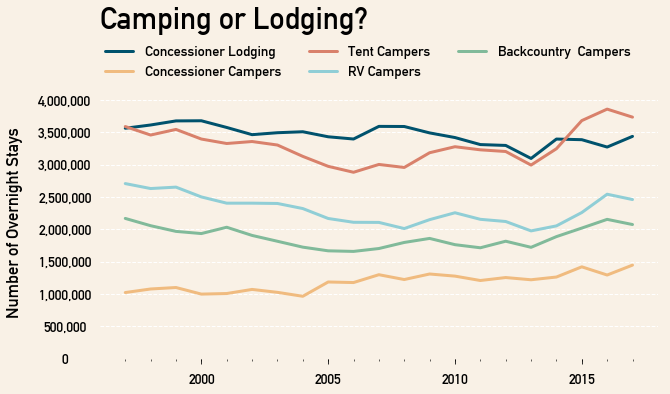

In [354]:
ax = overnights.plot(x='date_year',figsize=(10,5))
ax.yaxis.set_major_formatter(formatter)


# CUSTOMIZATION CODE GOES UNDER HERE

ax.set_title("Camping or Lodging?",pad = 58,loc='left',fontsize=30)
ax.legend(bbox_to_anchor=(0, 1.01, 1., .15), loc=3,
           ncol=3, borderaxespad=0)
ax.grid(False, axis='x')
ax.set_ylabel("Number of Overnight Stays",labelpad = 15)
ax.set_xlabel("")
ax.set_ylim(0,4200000)

ax.xaxis.tick_bottom()

#set number of tickers

ax.set_xticks(yearlist,minor=True)


plt.setp( ax.yaxis.get_majorticklabels(), ha="center" )



plt.rcParams.update({
  'lines.linewidth': 3,
  'lines.solid_capstyle': 'round',
  'font.family':'DIN Alternate' ,
  'font.stretch':'normal',
  'legend.fancybox': False,
  'legend.frameon':False,
  'axes.prop_cycle': cycler('color', ['#f0bb7f','#d9816b','#90ced6','#00526d','#81ba9a','#f15b40']),
  'axes.facecolor': '#f9f1e6',
'axes.grid': True,
  'axes.labelsize': 'large',
  'axes.axisbelow': True,
  'axes.formatter.limits':[-20,20],
  'axes.edgecolor': '#00526d',
  'axes.linewidth': 1.0,
  'axes.titlesize': 'x-large',
    'axes.spines.left'   : False,
    'axes.spines.bottom' : False,
    'axes.spines.top'    : False,
    'axes.spines.right'  : False,
 
  'grid.linestyle': '--',
  'grid.linewidth': 1.0,
  'grid.color': '#FFFFFF',
    'xtick.top'           : True,
    'xtick.major.pad': 10,
    'ytick.major.pad': 30,
    'ytick.left'           : True,
    'ytick.direction'      : 'out',
  'xtick.major.size': 0,
  'xtick.minor.size': 2,
  'ytick.major.size': 0,
  'ytick.minor.size': 0,
    'xtick.minor.visible'  : True,
  'font.size': 14.0,
    'savefig.facecolor'   : '#FFFFFF',


  'figure.facecolor': 'FFFFFF',
})


# then we save it
plt.savefig("graph_overnights_option.pdf",bbox_inches='tight')
plt.savefig('graph_overnights_option.png',bbox_inches='tight')
plt.show()

In [345]:
#Since the five lines seems pretty flat and 'boring', I'm going  to plot the percentage change instead and see if the 
#visual representation is more clear.

In [380]:
overnights.dtypes

Concessioner Lodging             int64
Concessioner Campers             int64
Tent Campers                     int64
RV Campers                       int64
Backcountry  Campers             int64
date_year               datetime64[ns]
dtype: object

In [409]:
overnights = overnights.sort_values(by = 'date_year')

In [410]:
pct_change = overnights[['Concessioner Lodging','Concessioner Campers','Tent Campers','RV Campers','Backcountry  Campers']].pct_change().fillna(0)

In [411]:
pct_change.rename(columns = {'Concessioner Lodging': 'Concessioner Lodging pct', 'Concessioner Campers': 'Concessioner Campers pct', 'Tent Campers': 'Tent Campers pct','RV Campers': 'RV Campers pct','Backcountry  Campers':'Backcountry Campers pct'},inplace = True)

In [436]:
overnights_all = pd.concat([pct_change,overnights],axis = 1)
overnights_all

,Concessioner Lodging pct,Concessioner Campers pct,Tent Campers pct,RV Campers pct,Backcountry Campers pct,Concessioner Lodging,Concessioner Campers,Tent Campers,RV Campers,Backcountry Campers,date_year
20,0.00,0.00,0.00,0.00,0.00,3562564,1023736,3589246,2707618,2169296,1997-01-01
19,0.01,0.05,-0.04,-0.03,-0.05,3612940,1078800,3457825,2630972,2056747,1998-01-01
18,0.02,0.02,0.03,0.01,-0.04,3676049,1101517,3544605,2652773,1968930,1999-01-01
17,0.00,-0.09,-0.04,-0.06,-0.02,3678262,999658,3395816,2501401,1935276,2000-01-01
16,-0.03,0.01,-0.02,-0.04,0.05,3574734,1008618,3326852,2404840,2032886,2001-01-01
15,-0.03,0.06,0.01,-0.00,-0.06,3463606,1071953,3357513,2404824,1906473,2002-01-01
14,0.01,-0.04,-0.02,-0.00,-0.05,3493479,1026930,3303365,2400287,1816270,2003-01-01
13,0.00,-0.06,-0.05,-0.03,-0.05,3508497,966135,3128014,2321669,1725309,2004-01-01
12,-0.02,0.23,-0.05,-0.07,-0.03,3430856,1186955,2974269,2168287,1668558,2005-01-01
11,-0.01,-0.01,-0.03,-0.03,-0.01,3396310,1178308,2882297,2109404,1659484,2006-01-01


In [434]:
'Concessioner Lodging pct','Concessioner Campers pct','Tent Campers pct','RV Campers pct','Backcountry Campers pct'

('Concessioner Lodging pct', 'Concessioner Campers pct', 'Tent Campers pct')

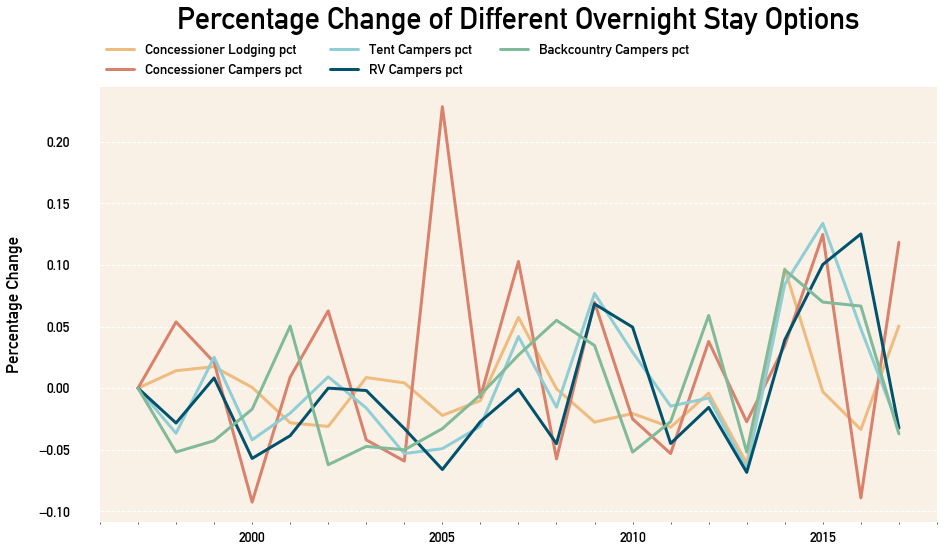

In [440]:
pct_year = overnights_all[['Concessioner Lodging pct','Concessioner Campers pct','Tent Campers pct','RV Campers pct','Backcountry Campers pct','date_year']]

ax = pct_year.plot(x='date_year',figsize = (15,8))

ax.set_title( 'Percentage Change of Different Overnight Stay Options',pad = 58,fontsize = 30,loc = 'center')
ax.legend(bbox_to_anchor=(0, 1.01, 1., .15), loc=3,
           ncol=3, borderaxespad=0)

ax.grid(False, axis='x')
ax.set_ylabel("Percentage Change",labelpad = 15)
ax.set_xlabel("")
ax.xaxis.tick_bottom()


plt.savefig("overnights_pct.pdf",bbox_inches='tight')
plt.savefig('overnights_pct.png',dpi = 600, bbox_inches='tight')
plt.show()                    



In [ ]:
#nope...still doesn't make sense...
#Since the popularity doesn't really change much over the past 20 years except for the concessioner lodging and camping,
#let's try do a treemap of 2017 data instead

In [172]:
overnights.head()

,Concessioner Lodging,Concessioner Campers,Tent Campers,RV Campers,Backcountry Campers,date_year
0,3437279,1447861,3734119,2460834,2074773,2017-01-01
1,3272026,1294573,3858162,2543221,2154698,2016-01-01
2,3385750,1421213,3680809,2260198,2020068,2015-01-01
3,3395578,1263610,3246320,2053965,1888095,2014-01-01
4,3095769,1221314,2993845,1976551,1722663,2013-01-01


In [202]:
overnights2017 = overnights.iloc[0,:-1].reset_index()
overnights2017.rename(columns={'index':'Option',0:'number of people'},inplace = True)
overnights2017 = overnights2017.sort_values(by='number of people',ascending = False)

In [213]:
overnights2017

,Option,number of people
2,Tent Campers,3734119
0,Concessioner Lodging,3437279
3,RV Campers,2460834
4,Backcountry Campers,2074773
1,Concessioner Campers,1447861


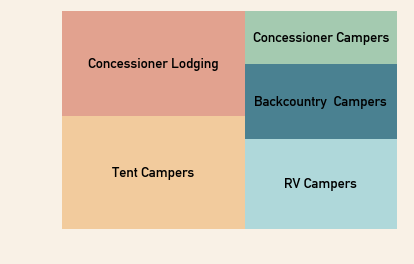

In [212]:
# libraries
import matplotlib.pyplot as plt
import squarify    # pip install squarify (algorithm for treemap)
 
# # If you have 2 lists
ax = squarify.plot(sizes=overnights2017['number of people'], label = overnights2017['Option'], alpha=.7,color=['#f0bb7f','#d9816b','#90ced6','#00526d','#81ba9a','#f15b40']) 

plt.axis('off')


plt.rcParams.update({
  'axes.prop_cycle': cycler('color', ['#f0bb7f','#d9816b','#90ced6','#00526d','#81ba9a','#f15b40'])})

plt.savefig("treemap.pdf",bbox_inches='tight')
plt.savefig('treemap.png',dpi = 600, bbox_inches='tight')

## Part 3: Which Month is the most popular month for NP visitation?

In [4]:
df = pd.read_excel('monthly_visits.xlsx')
df.head()

,Park,Region,State,Year,Month,Recreation Visits,Unnamed: 6
0,Acadia NP,Northeast,ME,1998,1,16726,NaN
1,Acadia NP,Northeast,ME,1998,2,17028,NaN
2,Acadia NP,Northeast,ME,1998,3,27500,NaN
3,Acadia NP,Northeast,ME,1998,4,81896,NaN
4,Acadia NP,Northeast,ME,1998,5,148052,NaN


In [5]:
monthly = pd.read_excel('monthly_visits.xlsx')
monthly = monthly[['Park','Region','State','Year','Month','Recreation Visits']]
monthly.shape

(14327, 6)

In [6]:
#changing column name
monthly.rename(columns={'Park': 'Park Name', 'Recreation Visits': 'Visits'}, inplace=True)

In [205]:
monthly.head()

,Park Name,Region,State,Year,Month,Visits,yr-month
0,Acadia NP,Northeast,ME,1998,1,16726,"(1998, 1)"
1,Acadia NP,Northeast,ME,1998,2,17028,"(1998, 2)"
2,Acadia NP,Northeast,ME,1998,3,27500,"(1998, 3)"
3,Acadia NP,Northeast,ME,1998,4,81896,"(1998, 4)"
4,Acadia NP,Northeast,ME,1998,5,148052,"(1998, 5)"


In [135]:
from matplotlib.ticker import FuncFormatter
def with_thousands(value,x_pos):
    thousands = int(value/1000)
    if thousands == 200:
        
        return "{} K".format(thousands)
    elif thousands ==0:
        return 0
    else:
        return thousands
    
formatter = FuncFormatter(with_thousands)

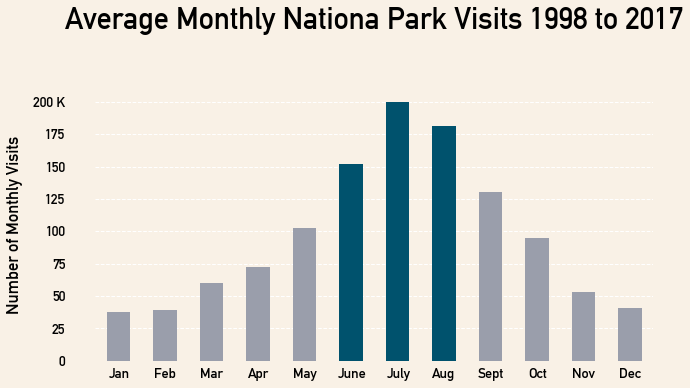

In [444]:

ax = monthly.groupby('Month')['Visits'].mean().plot(kind = 'bar', x='Month',y='Visits',figsize = (10,5))

plt.title("Average Monthly Nationa Park Visits 1998 to 2017",pad = 60,loc='center',fontsize=30)

ax.yaxis.set_major_formatter(formatter)

ax.set_xticklabels(["Jan", 'Feb','Mar','Apr','May','June','July','Aug','Sept','Oct','Nov','Dec'],rotation= 'horizontal')

ax.grid(False, axis='x')

ax.tick_params(axis='x', which='major', pad=7)

plt.minorticks_off()

ax.set_ylabel("Number of Monthly Visits",labelpad = 10)
ax.set_xlabel("")


plt.rcParams.update({
  
  'axes.prop_cycle': cycler('color', ['#9a9eab','#9a9eab','#9a9eab','#9a9eab','#9a9eab','#00526d','#00526d','#00526d','#9a9eab','#9a9eab','#9a9eab','#9a9eab']),
    'figure.facecolor': '#f9f1e6',
    'axes.facecolor':'#f9f1e6',
    'savefig.facecolor'   : '#f9f1e6',
    
    
 })

plt.savefig("popular_month.pdf",bbox_inches='tight')
plt.savefig("popular_month.png",dpi = 600, bbox_inches='tight')
plt.show()                      



In [136]:
df_new = monthly.groupby('Month')['Visits'].mean().reset_index()

In [137]:
df_new

,Month,Visits
0,1,37472.12
1,2,39460.77
2,3,60451.20
3,4,72741.27
4,5,102525.64
5,6,151982.22
6,7,199861.83
7,8,181034.99
8,9,130180.04
9,10,94784.98


In [141]:
df_new['pct']=df_new.Visits.pct_change().fillna(0)
df_new

,Month,Visits,pct
0,1,37472.12,0.00
1,2,39460.77,0.05
2,3,60451.20,0.53
3,4,72741.27,0.20
4,5,102525.64,0.41
5,6,151982.22,0.48
6,7,199861.83,0.32
7,8,181034.99,-0.09
8,9,130180.04,-0.28
9,10,94784.98,-0.27


In [143]:
151982.22/39460.77

3.851476288982704

## Part 4: Does gas price affect national park visits?

In [218]:
gas = pd.read_csv('gasmonthly.csv')

In [219]:
gas.head(10)

,DATE,GASREGW
0,1998-01-05,1.10
1,1998-01-12,1.09
2,1998-01-19,1.08
3,1998-01-26,1.07
4,1998-02-02,1.06
5,1998-02-09,1.05
6,1998-02-16,1.04
7,1998-02-23,1.04
8,1998-03-02,1.03
9,1998-03-09,1.02


In [221]:
gas.rename(columns={'GASREGW': 'gas_price'}, inplace=True)

In [222]:
gas['Year'] = oil.DATE.str.extract("^(\d\d\d\d)")

In [223]:
gas['Month'] = oil.DATE.str.extract("-0?([1-9]\d?)-")

In [224]:
gas['yr-mon'] = oil.DATE.str.extract("^(\d\d\d\d-0?[1-9]\d?)-")

In [225]:
gas.head()

,DATE,gas_price,Year,Month,yr-mon
0,1998-01-05,1.10,1998,1,1998-01
1,1998-01-12,1.09,1998,1,1998-01
2,1998-01-19,1.08,1998,1,1998-01
3,1998-01-26,1.07,1998,1,1998-01
4,1998-02-02,1.06,1998,2,1998-02


In [226]:
gas.gas_price.replace('.',0,inplace = True)

In [228]:

gas['gas_price']=gas.gas_price.astype('float',inplace = True)


In [229]:
gas.dtypes

DATE          object
gas_price    float64
Year          object
Month         object
yr-mon        object
dtype: object

In [230]:
gas20 = gas.groupby('yr-mon').gas_price.mean().reset_index()
gas20.shape

(240, 2)

In [28]:

monthly.head()

,Park Name,Region,State,Year,Month,Visits
0,Acadia NP,Northeast,ME,1998,1,16726
1,Acadia NP,Northeast,ME,1998,2,17028
2,Acadia NP,Northeast,ME,1998,3,27500
3,Acadia NP,Northeast,ME,1998,4,81896
4,Acadia NP,Northeast,ME,1998,5,148052


In [29]:
monthly['yr-month'] = list(zip(monthly.Year, monthly.Month))

In [30]:
monthly.head()

,Park Name,Region,State,Year,Month,Visits,yr-month
0,Acadia NP,Northeast,ME,1998,1,16726,"(1998, 1)"
1,Acadia NP,Northeast,ME,1998,2,17028,"(1998, 2)"
2,Acadia NP,Northeast,ME,1998,3,27500,"(1998, 3)"
3,Acadia NP,Northeast,ME,1998,4,81896,"(1998, 4)"
4,Acadia NP,Northeast,ME,1998,5,148052,"(1998, 5)"


In [31]:
visits20 = monthly.groupby('yr-month').Visits.sum().reset_index()

In [32]:
visits20.head()

,yr-month,Visits
0,"(1998, 1)",2271598
1,"(1998, 2)",2480372
2,"(1998, 3)",3340077
3,"(1998, 4)",4425601
4,"(1998, 5)",6204019


In [33]:
visits20.dtypes

yr-month    object
Visits       int64
dtype: object

In [231]:
gas_visits = pd.concat([gas20,visits20],axis = 1).drop('yr-month',axis = 1)


In [232]:
gas_visits.head()

,yr-mon,gas_price,Visits
0,1998-01,1.09,2271598
1,1998-02,1.05,2480372
2,1998-03,1.02,3340077
3,1998-04,1.03,4425601
4,1998-05,1.06,6204019


In [233]:
gas_visits['date_year'] = pd.to_datetime(gas_visits['yr-mon'],format = '%Y-%m')


In [234]:
gas_visits.head()

,yr-mon,gas_price,Visits,date_year
0,1998-01,1.09,2271598,1998-01-01
1,1998-02,1.05,2480372,1998-02-01
2,1998-03,1.02,3340077,1998-03-01
3,1998-04,1.03,4425601,1998-04-01
4,1998-05,1.06,6204019,1998-05-01


In [235]:
import statsmodels.api as sm

In [39]:
#After plotting the monthly data of both oil prices and visits, 
#i figured that the scatter plot didn't indicate any relationship
#i was thinking maybe i should control an 'invisible' varable here, which is climate 
#which actually affects the cyclical nature of the visitations monthly...

#Below I filtered out June data over the past 20 years and i want to see 
#if there's a correlation between the oil price and visitations 



In [237]:
X = gas_visits[gas_visits['yr-mon'].str.contains('-06')]['gas_price']
X = sm.add_constant(X)
Y = gas_visits[gas_visits['yr-mon'].str.contains('-06')]['Visits']

In [486]:
gas_visits[gas_visits['yr-mon'].str.contains('-06')]

,yr-mon,gas_price,Visits,date_year
5,1998-06,1.06,8864922,1998-06-01
17,1999-06,1.11,8856441,1999-06-01
29,2000-06,1.63,9017943,2000-06-01
41,2001-06,1.62,8709656,2001-06-01
53,2002-06,1.38,8852789,2002-06-01
65,2003-06,1.49,8907624,2003-06-01
77,2004-06,1.97,8536207,2004-06-01
89,2005-06,2.16,8620094,2005-06-01
101,2006-06,2.88,8108275,2006-06-01
113,2007-06,3.06,8410234,2007-06-01


In [238]:
#regressino on June data---not working...
model = sm.OLS(Y, X).fit()
predictions = model.predict(X) # make the predictions by the model

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Visits   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                 -0.051
Method:                 Least Squares   F-statistic:                   0.07202
Date:                Sun, 22 Jul 2018   Prob (F-statistic):              0.791
Time:                        23:11:10   Log-Likelihood:                -301.89
No. Observations:                  20   AIC:                             607.8
Df Residuals:                      18   BIC:                             609.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       9.225e+06      6e+05     15.377      0.000    7.96e+06    1.05e+07
gas_price  -6.072e+04   2.26e+05     -0.268      0.791   -5.36e+05    4.15e+05
==============================================================================
Omnibus:                       13.618   Durbin-Watson:                   0.212
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               11.572
Skew:                           1.670   Prob(JB):                      0.00307
Kurtosis:                       4.654   Cond. No.                         8.75
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

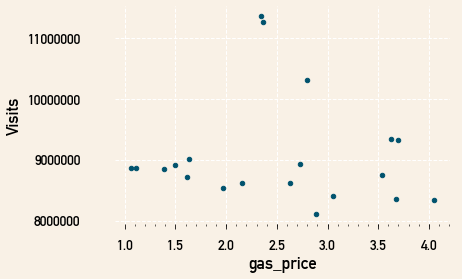

In [239]:
#scatter plot of June data points
gas_visits[gas_visits['yr-mon'].str.contains('-06')].plot(y = 'Visits', x = 'gas_price',kind = 'scatter')

In [44]:
# a critical error that I might made here is that a liner regression model might not be the best fit for my dataset...

In [241]:
X = gas_visits['gas_price']
X = sm.add_constant(X)
Y = gas_visits['Visits']

In [242]:
#This is the first regression i run between 240 pairs of oil price and visits (each month's data for 20 yrs)
#not working: R-square and p-values are just...
model = sm.OLS(Y, X).fit()
predictions = model.predict(X) # make the predictions by the model

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Visits   R-squared:                       0.008
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     1.850
Date:                Sun, 22 Jul 2018   Prob (F-statistic):              0.175
Time:                        23:12:06   Log-Likelihood:                -3942.8
No. Observations:                 240   AIC:                             7890.
Df Residuals:                     238   BIC:                             7897.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.997e+06   6.23e+05      8.018      0.000    3.77e+06    6.22e+06
gas_price     3.4e+05    2.5e+05      1.360      0.175   -1.52e+05    8.32e+05
==============================================================================
Omnibus:                       31.887   Durbin-Watson:                   0.345
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               23.327
Skew:                           0.653   Prob(JB):                     8.60e-06
Kurtosis:                       2.207   Cond. No.                         8.31
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

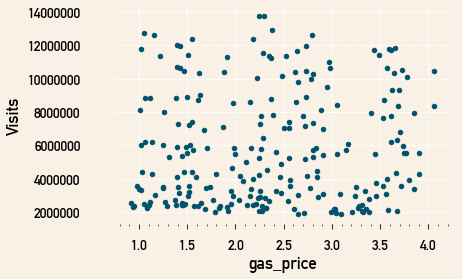

In [244]:
#scatter plot of all data points (monthly)
gas_visits.plot(y = 'Visits', x = 'gas_price',kind = 'scatter')

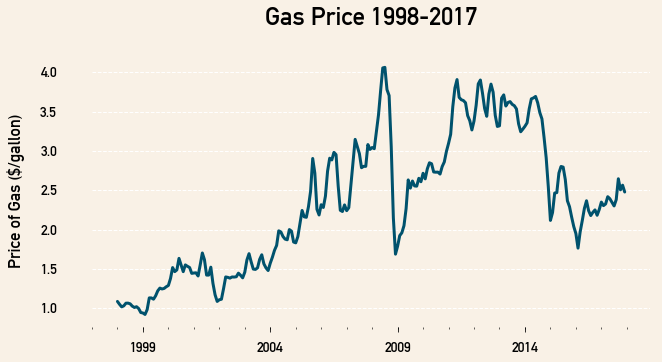

In [268]:
ax = gas_visits.plot(x = 'date_year', y = 'gas_price',figsize=(10,5),legend = False)
ax.set_title('Gas Price 1998-2017',pad = 30,loc='center',fontsize=25)

ax.grid(False, axis='x')

ax.set_xlabel('')

ax.set_ylabel("Price of Gas ($/gallon)",labelpad = 15)


plt.savefig("gas_price.pdf",bbox_inches='tight')
plt.savefig('gas_price.png',dpi = 600, bbox_inches='tight')

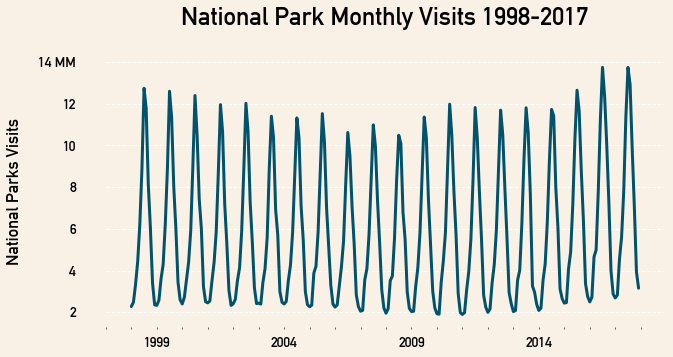

In [474]:
def with_millions(value,x_pos):
    millions = int(value/1000000)
    if millions == 14:
        return "{} MM".format(millions)
    elif millions ==0:
        return 0
    else:
        return millions

formatter = FuncFormatter(with_millions)
ax = gas_visits.plot(x = 'date_year', y = 'Visits',figsize = (10,5),legend = False)
ax.yaxis.set_major_formatter(formatter)


ax.grid(False, axis='x')

ax.set_xlabel('')

ax.set_title('National Park Monthly Visits 1998-2017',pad = 30,loc='center',fontsize=25)
ax.xaxis.tick_bottom()
ax.set_ylabel("National Parks Visits",labelpad = 15)

plt.savefig("visits_month.pdf",bbox_inches='tight')
plt.savefig('visits_month.png',dpi = 600, bbox_inches='tight')

In [267]:
NP_annual = parks_allnew.groupby('date_year').Visits.sum().reset_index()
NP_annual.head()

,date_year,Visits
0,1998-01-01,70862287.00
1,1999-01-01,70632517.00
2,2000-01-01,68925448.00
3,2001-01-01,66791331.00
4,2002-01-01,67275440.00


In [269]:
gas_annual = pd.read_csv('gas_annual.csv')

In [270]:
gas_annual.head()

,DATE,GASREGW
0,1998-01-01,1.03
1,1999-01-01,1.14
2,2000-01-01,1.48
3,2001-01-01,1.42
4,2002-01-01,1.34


In [271]:
gas_annual['date_year'] = pd.to_datetime(gas_annual['DATE'],format = '%Y-%m-%d')
gas_annual.rename(columns={'GASREGW': 'gas_price'}, inplace=True)

In [272]:
gas_annual.shape

(20, 3)

In [483]:
Y = NP_annual.Visits
X = gas_annual['gas_price']
X = sm.add_constant(X)

In [485]:
#This is the third regression i run between 20 pairs of annual oil price and visits

model = sm.OLS(Y, X).fit()
predictions = model.predict(X) # make the predictions by the model

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Visits   R-squared:                       0.058
Model:                            OLS   Adj. R-squared:                  0.006
Method:                 Least Squares   F-statistic:                     1.110
Date:                Mon, 23 Jul 2018   Prob (F-statistic):              0.306
Time:                        16:50:41   Log-Likelihood:                -339.45
No. Observations:                  20   AIC:                             682.9
Df Residuals:                      18   BIC:                             684.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       7.227e+07   4.07e+06     17.759      0.000    6.37e+07    8.08e+07
gas_price  -1.729e+06   1.64e+06     -1.054      0.306   -5.18e+06    1.72e+06
==============================================================================
Omnibus:                       14.146   Durbin-Watson:                   0.197
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               12.241
Skew:                           1.686   Prob(JB):                      0.00220
Kurtosis:                       4.821   Cond. No.                         8.64
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

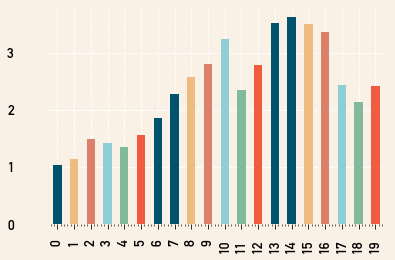

In [277]:
gas_annual.gas_price.plot(x='date_year',kind = 'bar')

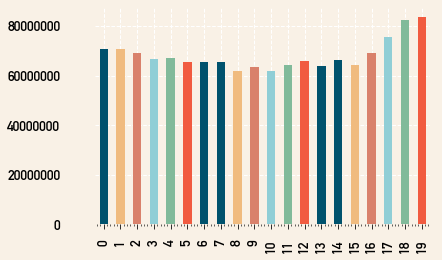

In [220]:
NP_annual.Visits.plot(x='date_year',kind='bar')

In [155]:
#Now a regression on recession period (2008)

In [278]:
X = gas_visits[gas_visits['yr-mon'].str.contains('2008')]['gas_price']
X = sm.add_constant(X)
Y = gas_visits[gas_visits['yr-mon'].str.contains('2008')]['Visits']

In [279]:
model = sm.OLS(Y, X).fit()
predictions = model.predict(X) # make the predictions by the model

model.summary()

/Users/christina/.pyenv/versions/3.6.5/lib/python3.6/site-packages/scipy/stats/stats.py:1394: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Visits   R-squared:                       0.561
Model:                            OLS   Adj. R-squared:                  0.517
Method:                 Least Squares   F-statistic:                     12.78
Date:                Sun, 22 Jul 2018   Prob (F-statistic):            0.00505
Time:                        23:44:13   Log-Likelihood:                -190.79
No. Observations:                  12   AIC:                             385.6
Df Residuals:                      10   BIC:                             386.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -4.928e+06   2.92e+06     -1.688      0.122   -1.14e+07    1.58e+06
gas_price   3.137e+06   8.77e+05      3.576      0.005    1.18e+06    5.09e+06
==============================================================================
Omnibus:                        2.154   Durbin-Watson:                   0.444
Prob(Omnibus):                  0.341   Jarque-Bera (JB):                0.917
Skew:                           0.094   Prob(JB):                        0.632
Kurtosis:                       1.659   Cond. No.                         17.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [282]:
gas_visits[gas_visits['yr-mon'].str.contains('2008')]

,yr-mon,gas_price,Visits,date_year
120,2008-01,3.04,1950410,2008-01-01
121,2008-02,3.03,2165093,2008-02-01
122,2008-03,3.24,3517070,2008-03-01
123,2008-04,3.46,3733739,2008-04-01
124,2008-05,3.77,5545067,2008-05-01
125,2008-06,4.05,8344277,2008-06-01
126,2008-07,4.06,10487888,2008-07-01
127,2008-08,3.78,10092879,2008-08-01
128,2008-09,3.70,6804880,2008-09-01
129,2008-10,3.05,5485261,2008-10-01


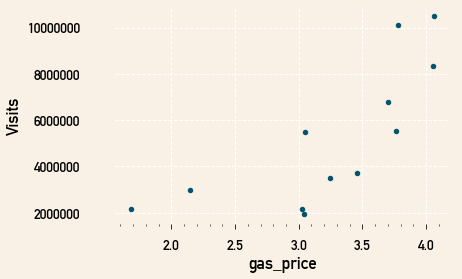

In [281]:
gas_visits[gas_visits['yr-mon'].str.contains('2008')].plot.scatter(x='gas_price',y='Visits')

In [302]:
gas_visits.head()

,yr-mon,gas_price,Visits,date_year
0,1998-01,1.09,2271598,1998-01-01
1,1998-02,1.05,2480372,1998-02-01
2,1998-03,1.02,3340077,1998-03-01
3,1998-04,1.03,4425601,1998-04-01
4,1998-05,1.06,6204019,1998-05-01


In [448]:
plt.rcParams.update({

  'axes.prop_cycle': cycler('color', ['#00526d','#f0bb7f','#d9816b','#90ced6','#81ba9a','#f15b40'])
})

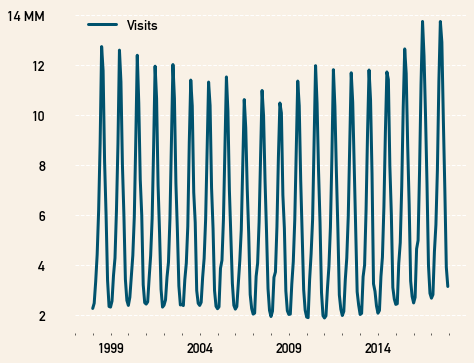

In [466]:
def with_millions(value,x_pos):
    millions = int(value/1000000)
    if millions == 14:
        
        return "{} MM".format(millions)
    elif millions ==0:
        return 0
    else:
        return millions


formatter = FuncFormatter(with_millions)
ax1 = gas_visits.plot(x='date_year',y='Visits',label="Visits", legend=True,figsize = (7,6))

ax1.yaxis.set_major_formatter(formatter)
ax1.grid(False, axis='x')
ax1.set_xlabel('')

ax1.xaxis.tick_bottom()

# plt.savefig("gas_visits_sep1.pdf",bbox_inches='tight')
# plt.savefig('gas_visits_sep1.pdf',dpi = 600, bbox_inches='tight')

Text(0.5,0,'')

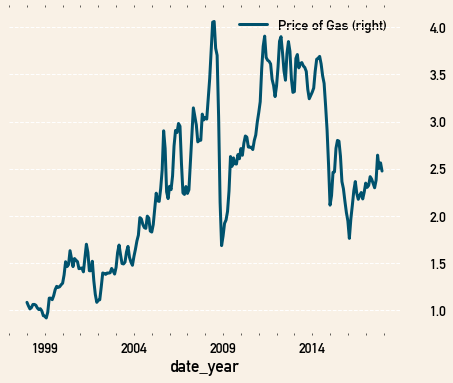

In [471]:

ax2= gas_visits.plot(x='date_year',y = 'gas_price',secondary_y=True, label="Price of Gas", legend=True,figsize=(7,6))


ax2.xaxis.tick_bottom()

ax2.set_xlabel('')

In [480]:
plt.rcParams.update({
  'lines.linewidth': 3,
  'lines.solid_capstyle': 'round',
  'font.family':'DIN ALTERNATE' ,
  'font.stretch':'normal',
  'legend.fancybox': False,
  'legend.frameon':False,
  'axes.prop_cycle': cycler('color', ['#00526d','#f0bb7f','#d9816b','#90ced6','#81ba9a','#f15b40']),
  'axes.facecolor': '#f9f1e6',
 'axes.grid': True,
  'axes.labelsize': 'large',
  'axes.axisbelow': True,


  'axes.linewidth': 1.0,
  'axes.titlesize': 'x-large',
    'axes.spines.left'   : False,
    'axes.spines.bottom' : False,
    'axes.spines.top'    : False,
    'axes.spines.right'  : False,
 
  'grid.linestyle': '--',
  'grid.linewidth': 1.0,
  'grid.color': '#FFFFFF',

    'xtick.major.pad': 10,
    'ytick.major.pad': 35,
    'ytick.left'           : True,
    'ytick.direction'      : 'out',
  'xtick.major.size': 5,
  'xtick.minor.size': 2,
  'ytick.major.size': 0,
  'ytick.minor.size': 0,
    'xtick.minor.visible'  : True,
  'font.size': 14.0,
  'figure.facecolor': '#f9f1e6',
'savefig.facecolor'   :  '#f9f1e6'  # figure facecolor when saving

})

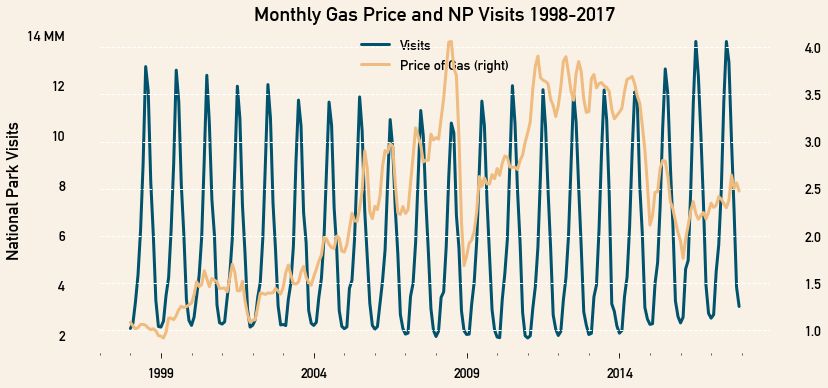

In [482]:
def with_millions(value,x_pos):
    millions = int(value/1000000)
    if millions == 14:
        
        return "{} MM".format(millions)
    elif millions ==0:
        return 0
    else:
        return millions

formatter = FuncFormatter(with_millions)



fig, ax = plt.subplots()

ax=gas_visits.plot(x='date_year',y='Visits',label="Visits", legend=True,figsize = (12,6),ax=ax,title = 'Monthly Gas Price and NP Visits 1998-2017')

ax.yaxis.set_major_formatter(formatter)
ax.set_ylabel('National Park Visits')

ax.grid(False, axis='x',zorder = 3)

gas_visits.plot(x='date_year',y='gas_price',secondary_y=True, label="Price of Gas", legend=True,ax=ax)

ax.set_xlabel('')

ax.xaxis.tick_bottom()

ax.set_axisbelow(True)

# plt.savefig("gas_visits.pdf",bbox_inches='tight')
# plt.savefig('gas_visits.png',dpi = 600, bbox_inches='tight')


## Part 4(optional): How much time did people spend on their visits to National Park?

In [85]:
rec_hours = pd.read_excel('recreational_hours.xlsx').fillna(0)
rec_hours.head()

,Park Name,1998,1999,2000,2001,2002,2003,2004,2005,2006,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,Average
0,Abraham Lincoln Birthplace NHP,250842.00,251204.00,236180.00,229675.00,250772.00,211650.00,201828.00,190809.00,200054.00,...,221111.00,177122.00,163568.00,169515.00,163928.00,241264.00,148605.00,252495.00,269580,211677.80
1,Acadia NP,13838352.00,13910921.00,13230679.00,13467741.00,13683657.00,13012171.00,11822104.00,10568105.00,10720555.00,...,11447560.00,12827516.00,12101384.00,12458831.00,11347331.00,13085317.00,14452151.00,22698596.00,24014370,13532716.65
2,Adams NHP,58943.00,76985.00,77664.00,151073.00,156764.00,192381.00,199477.00,182457.00,186479.00,...,243357.00,87431.00,278448.00,406022.00,443617.00,210593.00,218988.00,212705.00,254438,202218.90
3,African Burial Ground NM,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,57657.00,54996.00,43878.00,54711.00,34407.00,36820.00,32801.00,32539,43476.12
4,Agate Fossil Beds NM,41269.00,44590.00,43545.00,42226.00,39598.00,37710.00,37756.00,36811.00,33141.00,...,33053.00,31635.00,28542.00,28369.00,25684.00,31035.00,35051.00,38642.00,65694,36754.45


In [87]:
years = list(rec_hours.columns.values)[1:-1]
years

[1998,
 1999,
 2000,
 2001,
 2002,
 2003,
 2004,
 2005,
 2006,
 2007,
 2008,
 2009,
 2010,
 2011,
 2012,
 2013,
 2014,
 2015,
 2016,
 2017]

In [88]:
#Turn off scientific notation
pd.set_option('display.float_format', lambda x: '%.2f' % x) 

#wide to long data form
hours = pd.melt(rec_hours, id_vars='Park Name', value_vars=years)


In [89]:
hours.rename(columns={'variable': 'Year', 'value': 'Recreational Hours'}, inplace=True)

In [90]:
hours

,Park Name,Year,Recreational Hours
0,Abraham Lincoln Birthplace NHP,1998,250842.00
1,Acadia NP,1998,13838352.00
2,Adams NHP,1998,58943.00
3,African Burial Ground NM,1998,0.00
4,Agate Fossil Beds NM,1998,41269.00
5,Alibates Flint Quarries NM,1998,8235.00
6,Allegheny Portage Railroad NHS,1998,121024.00
7,Amistad NRA,1998,8545197.00
8,Andersonville NHS,1998,451306.00
9,Andrew Johnson NHS,1998,35769.00


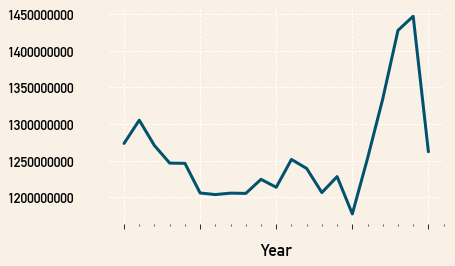

In [50]:
ax = hours.groupby('Year')['Recreational Hours'].sum().plot()

In [ ]:

plt.rcParams.update({
  'lines.linewidth': 3,
  'lines.solid_capstyle': 'round',
  'font.family':'DIN ALTERNATE' ,
  'font.stretch':'normal',
  'legend.fancybox': False,
  'legend.frameon':False,
  'axes.prop_cycle': cycler('color', ['#00526d','#f0bb7f','#d9816b','#90ced6','#81ba9a','#f15b40']),
  'axes.facecolor': '#f9f1e6',
 'axes.grid': True,
  'axes.labelsize': 'large',
  'axes.axisbelow': True,
  'axes.formatter.limits':[-20,20],
  'axes.edgecolor': '#00526d',
  'axes.linewidth': 1.0,
  'axes.titlesize': 'x-large',
    'axes.spines.left'   : False,
    'axes.spines.bottom' : False,
    'axes.spines.top'    : False,
    'axes.spines.right'  : False,
 
  'grid.linestyle': '--',
  'grid.linewidth': 1.0,
  'grid.color': '#FFFFFF',

    'xtick.major.pad': 10,
    'ytick.major.pad': 35,
    'ytick.left'           : True,
    'ytick.direction'      : 'out',
  'xtick.major.size': 5,
  'xtick.minor.size': 2,
  'ytick.major.size': 0,
  'ytick.minor.size': 0,
    'xtick.minor.visible'  : True,
  'font.size': 14.0,
  'figure.facecolor': '#f9f1e6',
#     'savefig.facecolor'   :  '#f9f1e6'  # figure facecolor when saving

})

#set number of tickers
import matplotlib.dates as mdates
import matplotlib.cbook as cbook

import numpy as np
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)
majorLocator = MultipleLocator(1)
majorFormatter = FormatStrFormatter('%d')



plt.setp( ax.yaxis.get_majorticklabels(), ha="center" )

ax = visits.groupby('date_year').Visits.sum().plot(x='Year',kind = 'line',figsize=(10,5))
ax.yaxis.set_major_formatter(formatter)
ax.set_title("US National Parks Visits",pad = 35,loc='left',fontsize=30)

ax.grid(False, axis='x')
ax.set_ylabel("Number of Visits",labelpad = 15)
ax.set_xlabel("")
#ax.set_ylim(0,4200000)

ax.xaxis.tick_bottom()


plt.savefig("graph_visits2.pdf",bbox_inches='tight')
plt.savefig('graph_visits.png',bbox_inches='tight')
plt.show()